# Loading Libraries

In [58]:
library(tidyverse)

# Loading Dataset

In [59]:
supplemental_clinical_data <- read.csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv")
train_clinical_data <- read.csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv")
train_peptides <- read.csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv")
train_proteins <- read.csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv")

In [60]:
head(supplemental_clinical_data)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,35_0,35,0,5,3,16,0,
2,35_36,35,36,6,4,20,0,
3,75_0,75,0,4,6,26,0,
4,75_36,75,36,1,8,38,0,On
5,155_0,155,0,NA,NA,0,NA,
6,337_0,337,0,5,7,6,0,On


In [61]:
head(train_clinical_data)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,55_0,55,0,10,6,15,NA,
2,55_3,55,3,10,7,25,NA,
3,55_6,55,6,8,10,34,NA,
4,55_9,55,9,8,9,30,0,On
5,55_12,55,12,10,10,41,0,On
6,55_18,55,18,7,13,38,0,On


In [62]:
head(train_peptides)

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>
1,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
2,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
3,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
4,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
5,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7
6,55_0,0,55,O00533,TLKIENVSYQDKGNYR,23216.5


In [64]:
head(train_proteins)

,visit_id,visit_month,patient_id,UniProt,NPX
,<chr>,<int>,<int>,<chr>,<dbl>
1,55_0,0,55,O00391,11254.30
2,55_0,0,55,O00533,732430.00
3,55_0,0,55,O00584,39585.80
4,55_0,0,55,O14498,41526.90
5,55_0,0,55,O14773,31238.00
6,55_0,0,55,O14791,4202.71


# Exploring Data

In [65]:
head(supplemental_clinical_data)
head(train_clinical_data)
head(train_peptides)
head(train_proteins)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,35_0,35,0,5,3,16,0,
2,35_36,35,36,6,4,20,0,
3,75_0,75,0,4,6,26,0,
4,75_36,75,36,1,8,38,0,On
5,155_0,155,0,NA,NA,0,NA,
6,337_0,337,0,5,7,6,0,On


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,55_0,55,0,10,6,15,NA,
2,55_3,55,3,10,7,25,NA,
3,55_6,55,6,8,10,34,NA,
4,55_9,55,9,8,9,30,0,On
5,55_12,55,12,10,10,41,0,On
6,55_18,55,18,7,13,38,0,On


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>
1,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
2,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
3,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
4,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
5,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7
6,55_0,0,55,O00533,TLKIENVSYQDKGNYR,23216.5


,visit_id,visit_month,patient_id,UniProt,NPX
,<chr>,<int>,<int>,<chr>,<dbl>
1,55_0,0,55,O00391,11254.30
2,55_0,0,55,O00533,732430.00
3,55_0,0,55,O00584,39585.80
4,55_0,0,55,O14498,41526.90
5,55_0,0,55,O14773,31238.00
6,55_0,0,55,O14791,4202.71


In [66]:
length(unique(train_clinical_data$patient_id))

[1] 248

In [67]:
length(unique(train_peptides$patient_id))

[1] 248

In [68]:
length(unique(train_proteins$patient_id))

[1] 248

In [69]:
cat("supplemental_clinical_data dimension:", dim(supplemental_clinical_data), "\n")
cat("train_clinical_data dimension:", dim(train_clinical_data), "\n")
cat("train_peptides dimension:", dim(train_peptides), "\n")
cat("train_proteins dimension:", dim(train_proteins), "\n")

supplemental_clinical_data dimension: 2223 8 
train_clinical_data dimension: 2615 8 
train_peptides dimension: 981834 6 
train_proteins dimension: 232741 5 


In [70]:
str(supplemental_clinical_data)
str(train_clinical_data)
str(train_peptides)
str(train_proteins)

'data.frame':	2223 obs. of  8 variables:
 $ visit_id                           : chr  "35_0" "35_36" "75_0" "75_36" ...
 $ patient_id                         : int  35 35 75 75 155 337 337 527 527 557 ...
 $ visit_month                        : int  0 36 0 36 0 0 36 0 36 0 ...
 $ updrs_1                            : num  5 6 4 1 NA 5 8 6 2 5 ...
 $ updrs_2                            : num  3 4 6 8 NA 7 7 2 18 6 ...
 $ updrs_3                            : num  16 20 26 38 0 6 8 9 22 22 ...
 $ updrs_4                            : num  0 0 0 0 NA 0 0 0 0 0 ...
 $ upd23b_clinical_state_on_medication: chr  "" "" "" "On" ...
'data.frame':	2615 obs. of  8 variables:
 $ visit_id                           : chr  "55_0" "55_3" "55_6" "55_9" ...
 $ patient_id                         : int  55 55 55 55 55 55 55 55 55 55 ...
 $ visit_month                        : int  0 3 6 9 12 18 24 30 36 42 ...
 $ updrs_1                            : int  10 10 8 8 10 7 16 14 17 12 ...
 $ updrs_2               

In [71]:
summary(supplemental_clinical_data)
summary(train_clinical_data)
summary(train_peptides)
summary(train_proteins)

   visit_id           patient_id     visit_month       updrs_1      
 Length:2223        Min.   :   35   Min.   : 0.00   Min.   : 0.000  
 Class :character   1st Qu.:16703   1st Qu.: 0.00   1st Qu.: 2.000  
 Mode  :character   Median :32915   Median : 6.00   Median : 5.000  
                    Mean   :32478   Mean   :12.91   Mean   : 5.684  
                    3rd Qu.:47243   3rd Qu.:24.00   3rd Qu.: 8.000  
                    Max.   :65530   Max.   :36.00   Max.   :27.000  
                                                    NA's   :213     
    updrs_2          updrs_3         updrs_4       
 Min.   : 0.000   Min.   : 0.00   Min.   : 0.0000  
 1st Qu.: 2.000   1st Qu.:14.00   1st Qu.: 0.0000  
 Median : 5.000   Median :22.00   Median : 0.0000  
 Mean   : 6.508   Mean   :22.92   Mean   : 0.8402  
 3rd Qu.:10.000   3rd Qu.:31.00   3rd Qu.: 0.0000  
 Max.   :34.000   Max.   :72.00   Max.   :12.0000  
 NA's   :214      NA's   :5       NA's   :928      
 upd23b_clinical_state_on_medica

   visit_id           patient_id     visit_month        updrs_1      
 Length:2615        Min.   :   55   Min.   :  0.00   Min.   : 0.000  
 Class :character   1st Qu.:16574   1st Qu.: 10.50   1st Qu.: 3.000  
 Mode  :character   Median :29417   Median : 24.00   Median : 6.000  
                    Mean   :32652   Mean   : 31.19   Mean   : 7.111  
                    3rd Qu.:50611   3rd Qu.: 48.00   3rd Qu.:10.000  
                    Max.   :65043   Max.   :108.00   Max.   :33.000  
                                                     NA's   :1       
    updrs_2          updrs_3         updrs_4      
 Min.   : 0.000   Min.   : 0.00   Min.   : 0.000  
 1st Qu.: 1.000   1st Qu.: 6.00   1st Qu.: 0.000  
 Median : 5.000   Median :19.00   Median : 0.000  
 Mean   : 6.744   Mean   :19.42   Mean   : 1.862  
 3rd Qu.:10.000   3rd Qu.:29.00   3rd Qu.: 3.000  
 Max.   :40.000   Max.   :86.00   Max.   :20.000  
 NA's   :2        NA's   :25      NA's   :1038    
 upd23b_clinical_state_on_medica

   visit_id          visit_month       patient_id      UniProt         
 Length:981834      Min.   :  0.00   Min.   :   55   Length:981834     
 Class :character   1st Qu.:  6.00   1st Qu.:16566   Class :character  
 Mode  :character   Median : 24.00   Median :29313   Mode  :character  
                    Mean   : 26.11   Mean   :32603                     
                    3rd Qu.: 48.00   3rd Qu.:49995                     
                    Max.   :108.00   Max.   :65043                     
   Peptide          PeptideAbundance   
 Length:981834      Min.   :       11  
 Class :character   1st Qu.:    28174  
 Mode  :character   Median :    74308  
                    Mean   :   642890  
                    3rd Qu.:   221339  
                    Max.   :178752000  

   visit_id          visit_month      patient_id      UniProt         
 Length:232741      Min.   :  0.0   Min.   :   55   Length:232741     
 Class :character   1st Qu.:  6.0   1st Qu.:16566   Class :character  
 Mode  :character   Median : 24.0   Median :29313   Mode  :character  
                    Mean   : 26.1   Mean   :32594                     
                    3rd Qu.: 48.0   3rd Qu.:49995                     
                    Max.   :108.0   Max.   :65043                     
      NPX           
 Min.   :       85  
 1st Qu.:    29464  
 Median :   113556  
 Mean   :  2712077  
 3rd Qu.:   563894  
 Max.   :613851000  

# Data Visualization

In [ ]:
library(ggplot2)
ggplot(train_clinical_data, aes(x = visit_month)) +
  geom_line(aes(y = updrs_1, color = "UPDRS Subscale 1"))
ggplot(train_clinical_data, aes(x = visit_month, y = updrs_1)) + geom_point() # scatterplot
ggplot(train_clinical_data, aes(x = visit_month, y = updrs_2)) + geom_point() # scatterplot
ggplot(train_clinical_data, aes(x = visit_month, y = updrs_3)) + geom_point() # scatterplot
ggplot(train_clinical_data, aes(x = visit_month, y = updrs_4)) + geom_point() # scatterplot

In [ ]:
library(ggplot2)

# Creating a dataframe with only the required columns
updrs_data <- supplemental_clinical_data[c("updrs_1", "updrs_2", "updrs_3", "updrs_4")]


# Creating the plot
ggplot(supplemental_clinical_data, aes(x = visit_month, y = c(, "updrs_1", "updrs_2", "updrs_3", "updrs_4"), color = updrs_1)) +
  geom_line() +
  labs(x = "visit_month", y = "updrs types", color = "UPDRS Subscale")

ggplot(supplemental_clinical_data, aes(x = visit_month)) +
  geom_line(aes(y = updrs_1, color = "UPDRS Subscale 1")) +
  geom_line(aes(y = updrs_2, color = "UPDRS Subscale 2")) +
  geom_line(aes(y = updrs_3, color = "UPDRS Subscale 3")) +
  geom_line(aes(y = updrs_4, color = "UPDRS Subscale 4")) +
  labs(x = "Visit Month", y = "UPDRS Types", color = "UPDRS Subscale")

In [ ]:
visualize_timeseries_target <- function(df) {
  
  # Get patient ID and time range
  patient_id <- df$patient_id[1]
  start <- min(df$visit_month)
  end <- max(df$visit_month)
  
  # Create plot
  plot <- ggplot(df, aes(x = visit_month)) + 
    geom_line(aes(y = updrs_1), colour = "blue", size = 2) + 
    geom_line(aes(y = updrs_2), colour = "green", size = 2) + 
    geom_line(aes(y = updrs_3), colour = "red", size = 2) + 
    geom_line(aes(y = updrs_4), colour = "purple", size = 2) + 
    scale_x_continuous(breaks = df$visit_month, 
                       labels = paste(df$visit_month, "(", df$upd23b_clinical_state_on_medication, ")")) +
    labs(x = "Visit Month", y = "UPDRS Scores", 
         title = paste("Patient ID:", patient_id, "Visit Month:", start, "-", end, "Progression")) +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size = 15),
          axis.text.y = element_text(size = 15),
          axis.title = element_text(size = 20, face = "bold"),
          plot.title = element_text(size = 20, face = "bold", hjust = 0.5))
  
  print(plot)
}

In [ ]:
library(dplyr)

supplemental_clinical_data %>%
  group_by(patient_id) %>%
  do(visualize_timeseries_target(.))

# Pre-processing

### joinning Data

In [34]:
library(dplyr)

# joining the datasets
merged_clinincal_proteins_data <- left_join(train_clinical_data, train_proteins, by = c("visit_id", "patient_id", "visit_month"), multiple = "all")
merged_proteins_peptides_data <- left_join(merged_clinincal_proteins_data, train_peptides, by = c("visit_id", "patient_id", "visit_month", "UniProt"), multiple = "all")

merged_proteins_peptides_data

visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,UniProt,NPX,Peptide,PeptideAbundance
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>
55_0,55,0,10,6,15,NA,,O00391,11254.30,NEQEQPLGQWHLS,11254.30
55_0,55,0,10,6,15,NA,,O00533,732430.00,GNPEPTFSWTK,102060.00
55_0,55,0,10,6,15,NA,,O00533,732430.00,IEIPSSVQQVPTIIK,174185.00
55_0,55,0,10,6,15,NA,,O00533,732430.00,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
55_0,55,0,10,6,15,NA,,O00533,732430.00,SMEQNGPGLEYR,30838.70
55_0,55,0,10,6,15,NA,,O00533,732430.00,TLKIENVSYQDKGNYR,23216.50
55_0,55,0,10,6,15,NA,,O00533,732430.00,VIAVNEVGR,170878.00
55_0,55,0,10,6,15,NA,,O00533,732430.00,VMTPAVYAPYDVK,148771.00
55_0,55,0,10,6,15,NA,,O00533,732430.00,VNGSPVDNHPFAGDVVFPR,55202.10


In [41]:
cleaned_data <- na.omit(merged_proteins_peptides_data)
cleaned_data

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,UniProt,NPX,Peptide,PeptideAbundance
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1870,55_12,55,12,10,10,41,0,On,O00391,15257.6,NEQEQPLGQWHLS,15257.60
1871,55_12,55,12,10,10,41,0,On,O00533,815083.0,GNPEPTFSWTK,114433.00
1872,55_12,55,12,10,10,41,0,On,O00533,815083.0,IEIPSSVQQVPTIIK,194848.00
1873,55_12,55,12,10,10,41,0,On,O00533,815083.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,34090.40
1874,55_12,55,12,10,10,41,0,On,O00533,815083.0,SMEQNGPGLEYR,30140.50
1875,55_12,55,12,10,10,41,0,On,O00533,815083.0,TLKIENVSYQDKGNYR,29528.60
1876,55_12,55,12,10,10,41,0,On,O00533,815083.0,VIAVNEVGR,184855.00
1877,55_12,55,12,10,10,41,0,On,O00533,815083.0,VMTPAVYAPYDVK,172592.00
1878,55_12,55,12,10,10,41,0,On,O00533,815083.0,VNGSPVDNHPFAGDVVFPR,54596.90


## converting categorical values into their own numerical

In [20]:
library('fastDummies')

# creating dummy variables for each categorical values
converted_data <- cleaned_data %>%
    dummy_cols(select_columns = c("upd23b_clinical_state_on_medication", "UniProt", "Peptide")) %>%
    select(-upd23b_clinical_state_on_medication, -upd23b_clinical_state_on_medication_, -UniProt, -Peptide, -visit_id)

In [35]:
converted_data

patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,NPX,PeptideAbundance,upd23b_clinical_state_on_medication_Off,upd23b_clinical_state_on_medication_On,⋯,Peptide_YSLTYIYTGLSK,Peptide_YTTEIIK,Peptide_YVGGQEHFAHLLILR,Peptide_YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,Peptide_YVMLPVADQDQC(UniMod_4)IR,Peptide_YVNKEIQNAVNGVK,Peptide_YWGVASFLQK,Peptide_YYC(UniMod_4)FQGNQFLR,Peptide_YYTYLIMNK,Peptide_YYWGGQYTWDMAK
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
55,12,10,10,41,0,15257.6,15257.60,0,1,⋯,0,0,0,0,0,0,0,0,0,0
55,12,10,10,41,0,815083.0,114433.00,0,1,⋯,0,0,0,0,0,0,0,0,0,0
55,12,10,10,41,0,815083.0,194848.00,0,1,⋯,0,0,0,0,0,0,0,0,0,0
55,12,10,10,41,0,815083.0,34090.40,0,1,⋯,0,0,0,0,0,0,0,0,0,0
55,12,10,10,41,0,815083.0,30140.50,0,1,⋯,0,0,0,0,0,0,0,0,0,0
55,12,10,10,41,0,815083.0,29528.60,0,1,⋯,0,0,0,0,0,0,0,0,0,0
55,12,10,10,41,0,815083.0,184855.00,0,1,⋯,0,0,0,0,0,0,0,0,0,0
55,12,10,10,41,0,815083.0,172592.00,0,1,⋯,0,0,0,0,0,0,0,0,0,0
55,12,10,10,41,0,815083.0,54596.90,0,1,⋯,0,0,0,0,0,0,0,0,0,0


In [36]:
unique(cleaned_data$upd23b_clinical_state_on_medication)

[1] "On"  ""    "Off"

In [22]:
colnames(converted_data)

[1] "patient_id"                                                                                     
   [2] "visit_month"                                                                                    
   [3] "updrs_1"                                                                                        
   [4] "updrs_2"                                                                                        
   [5] "updrs_3"                                                                                        
   [6] "updrs_4"                                                                                        
   [7] "NPX"                                                                                            
   [8] "PeptideAbundance"                                                                               
   [9] "upd23b_clinical_state_on_medication_Off"                                                        
  [10] "upd23b_clinical_state_on_medication_On"                                                         
  [11] "UniProt_O00391"                                                                                 
  [12] "UniProt_O00533"                                                                                 
  [13] "UniProt_O00584"                                                                                 
  [14] "UniProt_O14498"                                                                                 
  [15] "UniProt_O14773"                                                                                 
  [16] "UniProt_O14791"                                                                                 
  [17] "UniProt_O15240"                                                                                 
  [18] "UniProt_O15394"                                                                                 
  [19] "UniProt_O43505"                                                                                 
  [20] "UniProt_O60888"                                                                                 
  [21] "UniProt_O75144"                                                                                 
  [22] "UniProt_O75326"                                                                                 
  [23] "UniProt_O94919"                                                                                 
  [24] "UniProt_P00441"                                                                                 
  [25] "UniProt_P00450"                                                                                 
  [26] "UniProt_P00734"                                                                                 
  [27] "UniProt_P00736"                                                                                 
  [28] "UniProt_P00738"                                                                                 
  [29] "UniProt_P00746"                                                                                 
  [30] "UniProt_P00747"                                                                                 
  [31] "UniProt_P00748"                                                                                 
  [32] "UniProt_P00751"                                                                                 
  [33] "UniProt_P01008"                                                                                 
  [34] "UniProt_P01009"                                                                                 
  [35] "UniProt_P01011"                                                                                 
  [36] "UniProt_P01019"                                                                                 
  [37] "UniProt_P01023"                                                                                 
  [38] "UniProt_P01024"                                                                                 
  [39] "UniPr

In [37]:
sum(is.na(converted_data))

[1] 0

## Correlation

In [ ]:
library(ggplot2)
library(reshape2)

# Computing the correlation matrix
corr_matrix <- cor(select_if(cleaned_data, is.numeric), use = "pairwise.complete.obs")

# Creating a heatmap of the correlation matrix
ggplot(melt(corr_matrix), aes(Var1, Var2, fill = value)) + 
  geom_tile() + 
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Correlation") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_fixed()

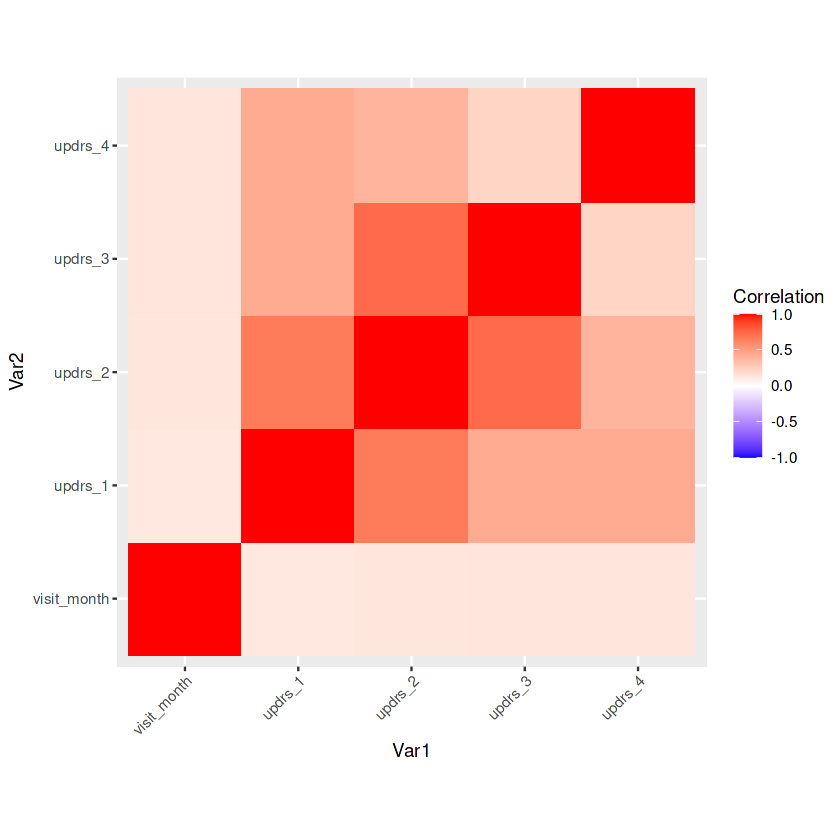

In [25]:
library(ggplot2)
library(reshape2)

# Computing the correlation matrix
corr_matrix <- cor(train_clinical_data[, c("visit_month", "updrs_1", "updrs_2", "updrs_3", "updrs_4")], use = "pairwise.complete.obs")

# Creating a heatmap of the correlation matrix
ggplot(melt(corr_matrix), aes(Var1, Var2, fill = value)) + 
  geom_tile() + 
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Correlation") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_fixed()

corrplot 0.92 loaded



,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,NPX,PeptideAbundance
patient_id,1.0000000000,-0.057976794,-0.019219679,-0.078426432,-0.057346980,-0.0331989582,-0.001103753,-0.0002745191
visit_month,-0.0579767940,1.000000000,0.122294427,0.173942443,0.221344599,0.1088704821,-0.001520018,-0.0018264595
updrs_1,-0.0192196788,0.122294427,1.000000000,0.660025486,0.408177397,0.4519937408,-0.002698790,-0.0015311281
updrs_2,-0.0784264318,0.173942443,0.660025486,1.000000000,0.689726258,0.4081282801,-0.002320369,-0.0020141710
updrs_3,-0.0573469804,0.221344599,0.408177397,0.689726258,1.000000000,0.2452002766,-0.001125237,-0.0010656820
updrs_4,-0.0331989582,0.108870482,0.451993741,0.408128280,0.245200277,1.0000000000,-0.001717425,-0.0009789172
NPX,-0.0011037528,-0.001520018,-0.002698790,-0.002320369,-0.001125237,-0.0017174247,1.000000000,0.5053719394
PeptideAbundance,-0.0002745191,-0.001826459,-0.001531128,-0.002014171,-0.001065682,-0.0009789172,0.505371939,1.0000000000


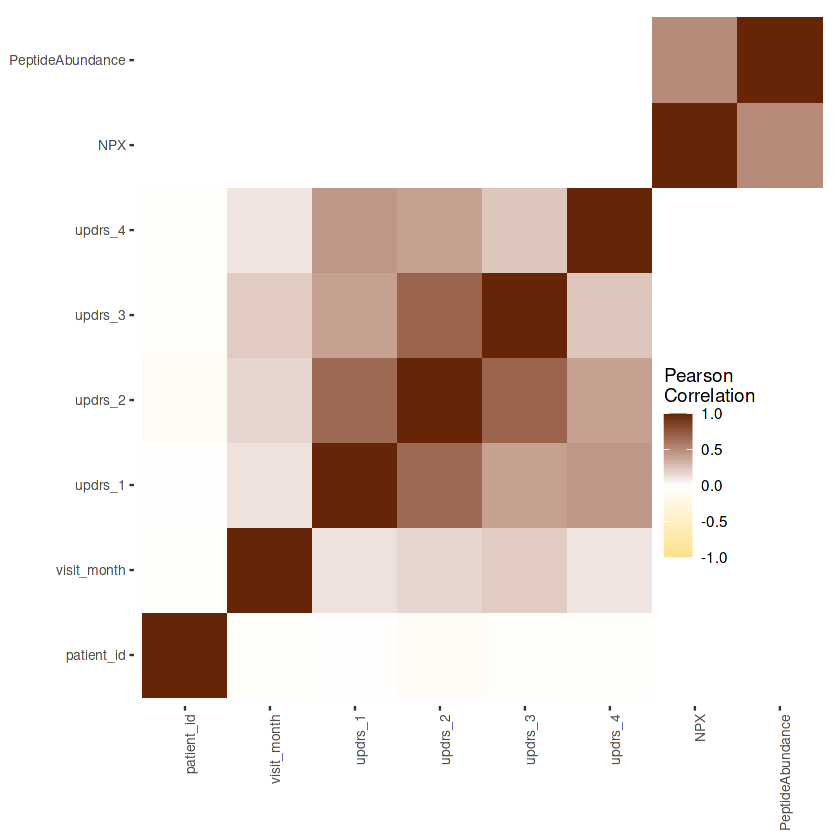

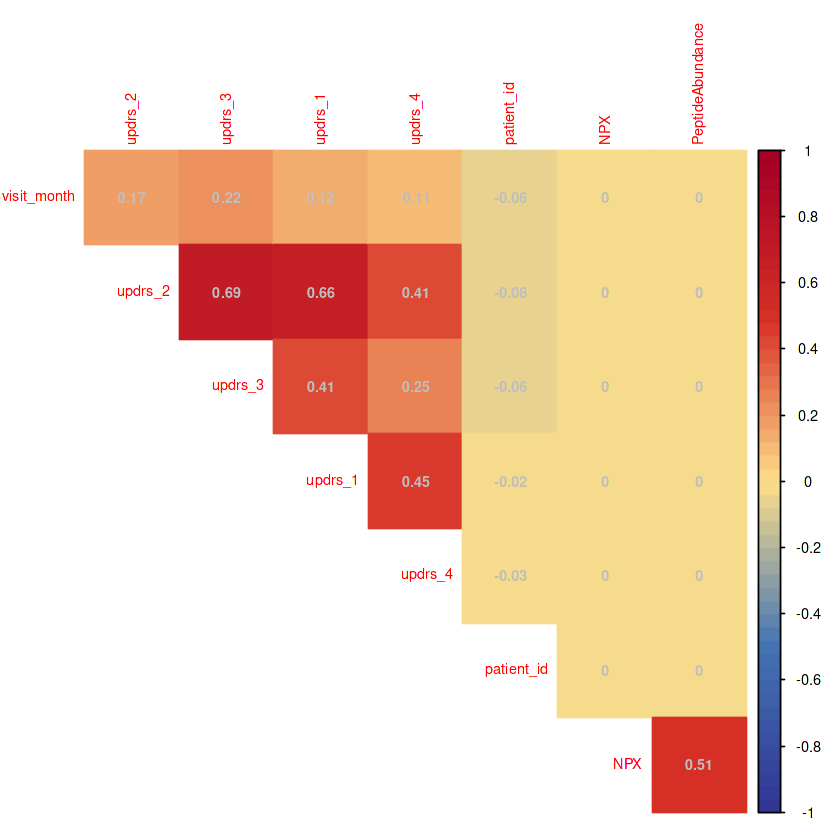

In [26]:
# Load libraries
library(ggplot2)
library(corrplot)
library(reshape2)

# Computing the correlation matrix
cor_matrix <- cor(select_if(cleaned_data, is.numeric))
cor_matrix

# Creating the correlation plot with ggplot2
ggplot(data = melt(cor_matrix), aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "#FEE08B", mid = "white", high = "#662506", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Pearson\nCorrelation") +
  theme(axis.text.x = element_text(angle = 90, vjust = 1, 
                                   size = 8, hjust = 1),
        axis.text.y = element_text(size = 8),
        axis.title = element_blank(),
        panel.grid.major = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        axis.line = element_blank(),
        legend.justification = c(1, 0),
        legend.position = c(0.9, 0.2),
        legend.direction = "vertical") +
  coord_equal()

# Creating the correlation plot
corrplot(cor_matrix, method = "color", col = colorRampPalette(c("#313695", "#4575B4", "#FEE08B", "#D73027", "#A50026"))(50), 
         type = "upper", order = "hclust", addCoef.col = "grey", number.cex = 0.7, tl.cex = 0.7, cl.cex = 0.7, diag = FALSE)

In [27]:
library(dplyr)

correlation <- function(df) {
    
    # create a dataframe of correlations with updrs variables
    X <- c("updrs_1", "updrs_2", "updrs_3", "updrs_4")
    for (x in X) {
        cor_df <- cor(df)[, x] %>% 
            abs() %>%
            sort(decreasing = TRUE) %>%
            as.data.frame()

        # rename the correlation column
        names(cor_df)[1] <- "correlation"


        print(cor_df)
    }
    
}

correlation(select_if(cleaned_data, is.numeric))

                 correlation
updrs_1          1.000000000
updrs_2          0.660025486
updrs_4          0.451993741
updrs_3          0.408177397
visit_month      0.122294427
patient_id       0.019219679
NPX              0.002698790
PeptideAbundance 0.001531128
                 correlation
updrs_2          1.000000000
updrs_3          0.689726258
updrs_1          0.660025486
updrs_4          0.408128280
visit_month      0.173942443
patient_id       0.078426432
NPX              0.002320369
PeptideAbundance 0.002014171
                 correlation
updrs_3          1.000000000
updrs_2          0.689726258
updrs_1          0.408177397
updrs_4          0.245200277
visit_month      0.221344599
patient_id       0.057346980
NPX              0.001125237
PeptideAbundance 0.001065682
                  correlation
updrs_4          1.0000000000
updrs_1          0.4519937408
updrs_2          0.4081282801
updrs_3          0.2452002766
visit_month      0.1088704821
patient_id       0.0331989582
NPX    

# Modelling

In [28]:
smape <- function(actual, predicted) {
  200 * mean(abs(actual - predicted) / (abs(actual) + abs(predicted)))
}

In [29]:
smape(7, 12)

[1] 52.63158

In [75]:
library(caret)


train <- read.csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv")
test <- read.csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/test.csv")


# Specifying target variables
target <- c("updrs_1", "updrs_2", "updrs_3", "updrs_4")


# Training models
models <- list()
for(u in target) {
    
  # Droping NAs
  temp <- train[!is.na(train[, u]), ]
  # For updrs_3, dropping 0's improve results
  if(u == "updrs_3") {
    temp <- temp[temp[, u] != 0, ]
  }
    
  # Training data
  X <- data.frame(temp$visit_month)
  colnames(X) <- "visit_month"
  y <- temp[, u]
  model <- train(X, y, method = "lm")
    
  # Saving model
  models[[u]] <- model
}

In [ ]:
get_predictions <- function(my_train, models) {
    
  # Initializing results data frame
  result <- data.frame(prediction_id = character(),
                       rating = character(),
                       stringsAsFactors = FALSE)
  for(u in target) {
    # Here is where we will save the final results
    my_train[paste0("result_", u)] <- 0
    # Predicting
    X <- data.frame(my_train$visit_month)
    colnames(X) <- "visit_month"
    # updrs_4 will have only 0's, so we update for others
    library(e1071)
    if(u != "updrs_4") {
      my_train[paste0("result_", u)] <- predict(models[[u]], X)
    # Rounding the ratings to the nearest integer
      my_train[paste0("result_", u)] <- round(my_train[paste0("result_", u)])
    }
    
    # Format for final submission
    for(m in c(0, 6, 12, 24)) {
      temp <- data.frame(
        prediction_id = paste0(my_train$visit_id, "_updrs_", gsub("updrs_", "", u), "_plus_", m, "_months"),
        rating = my_train[paste0("result_", u)]
      )
      # Setting column names of temp to be the same as result
      colnames(temp) <- colnames(result)
      result <- rbind(result, temp)
    }
  }
  result <- unique(result)
  return(result)
}



# Initializing the API environment
setwd("/kaggle/input/amp-parkinsons-disease-progression-prediction")
env <- make.env()

# Iterating through test data
iter_test <- env$iter_test()

for (i in seq_along(iter_test)) {
    temp <- iter_test[[i]]
    result <- get_predictions(temp$data, model)
    env$predict(result)
}


# Result

In [77]:
get_predictions(test, models)

,prediction_id,rating
,<chr>,<dbl>
1,3342_0_updrs_1_plus_0_months,6
5,50423_0_updrs_1_plus_0_months,6
9,3342_6_updrs_1_plus_0_months,6
13,50423_6_updrs_1_plus_0_months,6
17,3342_0_updrs_1_plus_6_months,6
21,50423_0_updrs_1_plus_6_months,6
25,3342_6_updrs_1_plus_6_months,6
29,50423_6_updrs_1_plus_6_months,6
33,3342_0_updrs_1_plus_12_months,6


# Side work for lasso regression and Feature selection

In [74]:
# Working with just sample data as the there is a data dimension issue

library(dplyr)

sampled_data <- converted_data %>% 
  sample_n(490952)

sampled_data

patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,NPX,PeptideAbundance,upd23b_clinical_state_on_medication_Off,upd23b_clinical_state_on_medication_On,⋯,Peptide_YSLTYIYTGLSK,Peptide_YTTEIIK,Peptide_YVGGQEHFAHLLILR,Peptide_YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,Peptide_YVMLPVADQDQC(UniMod_4)IR,Peptide_YVNKEIQNAVNGVK,Peptide_YWGVASFLQK,Peptide_YYC(UniMod_4)FQGNQFLR,Peptide_YYTYLIMNK,Peptide_YYWGGQYTWDMAK
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
55,36,17,18,51,0,4598380.0,136521.00,0,1,⋯,0,0,0,0,0,0,0,0,0,0
22126,48,25,13,16,8,1525550.0,70573.50,0,1,⋯,0,0,0,0,0,0,0,0,0,0
52266,24,8,8,48,0,240847.0,70576.40,1,0,⋯,0,0,0,0,0,0,0,0,0,0
26809,12,8,20,27,0,109968.0,25827.70,1,0,⋯,0,0,0,0,0,0,0,0,0,0
64669,48,18,18,49,0,425103.0,25175.40,1,0,⋯,0,0,0,0,0,0,0,0,0,0
21537,48,2,3,30,0,782718.0,98958.50,1,0,⋯,0,0,0,0,0,0,0,0,0,0
10053,18,2,2,0,0,437391.0,286118.00,0,0,⋯,0,0,0,0,0,0,0,0,0,0
20664,36,8,16,51,0,3296490.0,227824.00,1,0,⋯,0,0,0,0,0,0,0,0,0,0
30119,24,14,15,15,0,207278000.0,1204950.00,0,1,⋯,0,0,0,0,0,0,0,0,0,0


In [79]:
# for feature selection using lasso

library(glmnet)

# selecting the predictors and target variables
features <- sampled_data[, !(colnames(sampled_data) %in% c("updrs_1", "updrs_2", "updrs_3", "updrs_4"))]
targets <- sampled_data[, c("updrs_1", "updrs_2", "updrs_3", "updrs_4")]

# creating the design matrix and response vector
X <- as.matrix(features)
y <- targets


In [ ]:
# fit separate lasso models for each target variable
lasso_models <- list()
for (i in seq_along(targets)) {
  lasso_models[[i]] <- cv.glmnet(X, y[, i], alpha = 1, standardize = TRUE, nfolds = 5)
}

# identifying the selected features for each target variable
selected_features <- list()
for (i in seq_along(targets)) {
  coef_i <- coef(lasso_models[[i]])
  selected_features[[i]] <- rownames(coef_i)[coef_i[,1] != 0]
}

# taking the intersection of the selected features across all models
selected_features <- Reduce(intersect, selected_features)

# select the final features from the design matrix
# X_final <- X[, selected_features]

In [ ]:
lasso_models

In [ ]:
selected_features

I tried doing feature selection using lassso with all the paramaters as well as without the parameter. in both cases, surprisisgly, none of proteins and peptides variable were turned out to be important accorrding to the result. Only, 'visit_month', 'upd23b_clinical_state_on_medication_Off', 'upd23b_clinical_state_on_medication_On'columns had importance. 

In [ ]:
final_df <- converted_data %>%
    select(visit_month, updrs_1, updrs_2, updrs_3, updrs_4, upd23b_clinical_state_on_medication_Off, upd23b_clinical_state_on_medication_On)
final_df

In [ ]:
# Specify target variables
features <- final_df[, !(colnames(final_df) %in% c("updrs_1", "updrs_2", "updrs_3", "updrs_4"))]
target <- c("updrs_1", "updrs_2", "updrs_3", "updrs_4")

# Train models
models <- list()
for(u in target) {
  
  # Train data
  X <- as.matrix(features$visit_month)
  y <- final_df[, u]
  model <- cv.glmnet(X, y, alpha = 1, standardize = TRUE, nfolds = 5)
  # Save model
  models[[u]] <- model
}

In [ ]:
# get_predictions_rough <- function(my_train, models) {
#   # Initialize results data frame
#   result <- data.frame(prediction_id = character(),
#                        rating = character(),
#                        stringsAsFactors = FALSE)
#   for(u in target) {
#     # Here is where we will save the final results
#     my_train[paste0("result_", u)] <- 0
#     # Predict
#     X <- data.frame(my_train$visit_month)
#     colnames(X) <- "visit_month"
#     # updrs_4 will have only 0's, so we update for others
#     if(u != "updrs_4") {
#       my_train[paste0("result_", u)] <- predict(models[[u]], as.matrix(my_train[,-c(1:2)]))
#     }
    
#     # Format for final submission
#     for(m in c(0, 6, 12, 24)) {
#       temp <- data.frame(
#         prediction_id = paste0(my_train$visit_id, "_updrs_", gsub("updrs_", "", u), "_plus_", m, "_months"),
#         rating = my_train[paste0("result_", u)]
#       )
#       # Set column names of temp to be the same as result
#       colnames(temp) <- colnames(result)
#       result <- rbind(result, temp)
#     }
#   }
#   result <- unique(result)
#   return(result)
# }

# # Call the updated function with the training data and models
# get_predictions_rough(test, models)

In [ ]:
models

# Side rough model work

In [ ]:
# get_predictions_part1 <- function(train, models) {
#   # Create empty data frame to store results
#   result <- data.frame(prediction_id = numeric(),
#                        rating = character(),
#                        stringsAsFactors = FALSE)
  
#   # Loop through models and get predictions for each model
#   for (i in seq_along(models)) {
#     # Get predictions for current model
#     pred <- predict(models[[i]], train)
    
#     # Append predictions to result data frame
#     result <- rbind(result, data.frame(prediction_id = 1:nrow(train),
#                                         rating = as.character(pred),
#                                         stringsAsFactors = FALSE))
#   }
  
#   # Return unique prediction id and rating combinations
#   result <- result[!duplicated(result[c("prediction_id", "rating")]), ]
#   return(result)
# }

# get_predictions_part1(train, models)

In [ ]:
# get_smape <- function(y_pred, y_true) {
#   n <- length(y_pred)
#   smape <- sum(abs(y_pred - y_true) / (abs(y_pred) + abs(y_true))) * (200 / n)
#   return(smape)
# }

# get_predictions <- function(my_train, models) {
#   # Initialize results data frame
#   result <- data.frame(prediction_id = character(),
#                        rating = character(),
#                        stringsAsFactors = FALSE)
#   # Initialize SMAPE list
#   smape_list <- list()
#   for(u in target) {
#     # Here is where we will save the final results
#     my_train[paste0("result_", u)] <- 0
#     # Predict
#     X <- data.frame(my_train$visit_month)
#     colnames(X) <- "visit_month"
#     # updrs_4 will have only 0's, so we update for others
#     if(u != "updrs_4") {
#       my_train[paste0("result_", u)] <- predict(models[[u]], X)
#       # Round the ratings to the nearest integer
#       my_train[paste0("result_", u)] <- round(my_train[paste0("result_", u)])
#     }
    
#     # Calculate SMAPE
#     smape_list[[u]] <- get_smape(my_train[paste0("result_", u)], my_train[paste0(u)])
    
#     # Format for final submission
#     for(m in c(0, 6, 12, 24)) {
#       temp <- data.frame(
#         prediction_id = paste0(my_train$visit_id, "_updrs_", gsub("updrs_", "", u), "_plus_", m, "_months"),
#         rating = my_train[paste0("result_", u)]
#       )
#       # Set column names of temp to be the same as result
#       colnames(temp) <- colnames(result)
#       result <- rbind(result, temp)
#     }
#   }
  
#   # Print SMAPEs
#   for(u in target) {
#     cat(paste0("SMAPE for ", u, ": ", smape_list[[u]], "\n"))
#   }
  
#   result <- unique(result)
#   return(result)
# }

# get_predictions(test, models)

In [ ]:
# get_predictions_part2 <- function(my_train, models) {
#   # Initialize results data frame
#   result <- data.frame(prediction_id = character(),
#                        rating = character(),
#                        stringsAsFactors = FALSE)
#   for(u in target) {
#       # Here is where we will save the final results
#       my_train[paste0("result_", u)] <- 0
#       # Predict
#       X <- data.frame(my_train$visit_month)
#       colnames(X) <- "visit_month"
#       # updrs_4 will have only 0's, so we update for others
#       if(u != "updrs_4") {
#           my_train[paste0("result_", u)] <- predict(models[[u]], X)
#       }
#   }
      
#   # Format for final submission
#   for(m in c(0, 6, 12, 24)) {
#       for(i in c(1, 2, 3, 4)) {
#           temp <- data.frame(
#               prediction_id = paste0(my_train$visit_id, "_updrs_", gsub("updrs_", "", u), "_plus_", m, "_months"),
#               rating = my_train[paste0("result_", u)]
#           )
#           # Set column names of temp to be the same as result
#           colnames(temp) <- colnames(result)
#           result <- rbind(result, temp)
#       }
#   }
#   result <- unique(result)
#   return(result)
# }

# # Call the updated function with the training data and models
# get_predictions_part2(test, models)



# Reference

https://www.movementdisorders.org/MDS-Files1/PDFs/Rating-Scales/MDS-UPDRS_English_FINAL.pdf
https://www.kaggle.com/code/gunesevitan/amp-pdpp-eda/notebook#7.-Progression
https://www.kaggle.com/code/renataghisloti/simple-linearregression-updated-56-6-smape/notebook